<h1>logistic regression without applying polynomin</h1>

do regularization with modal 'liblinear' with pca

<!-- # <h4>score: private 0.745 - public 0.753</h4> -->
PCA
<li>2: 0.549</li>
<li>50: 0.626</li>
<li>100: 0.644</li>
<li>150: 0.67</li>
<li>200: 0.69</li>
<li>250: 0.688</li>

In [9]:
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



train_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/train.csv'
test_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/test.csv'



In [43]:
# Create a pipeline with PCA and logistic regression
pc_num = 150


pipe = Pipeline([
    ('pca', PCA(n_components=pc_num)), # choose number of components to keep
    ('clf', LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced', max_iter = 1000, penalty='l1'))
])

In [44]:
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train_y = train['target']
train = train.drop(columns=['id', 'target'])

test = test.drop(columns=['id'])


robust_scaler = RobustScaler().fit(train.values)
trans_x = robust_scaler.transform(train.values)
trans_test = robust_scaler.transform(test.values)

In [45]:
pipe.fit(trans_x, train_y)

predictions = pipe.predict(trans_test)

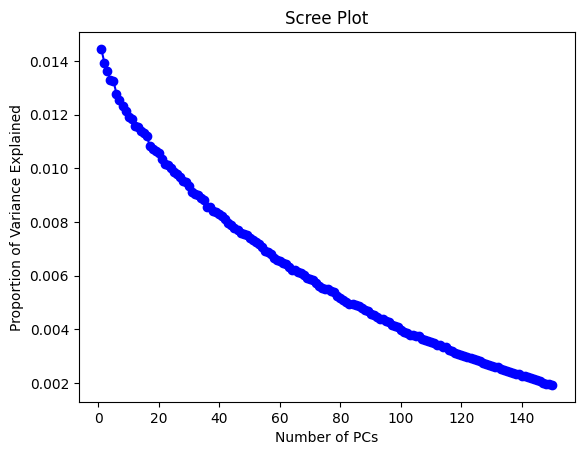

In [46]:
# Create a scree plot
plt.plot(np.arange(1, pipe['pca'].n_components_+1), pipe['pca'].explained_variance_ratio_, 'bo-')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

In [47]:
pred_result_list = [int(round(x)) for x in predictions]

# pred_result_list

<h3>Real prediction on testing data</h3>

In [48]:




with open('../result_folder/logistic_V11_pca'+ str(pc_num) +'.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "target"])
    for i in range(250, 20000):
        writer.writerow([i, pred_result_list[i-250]])
    file.close()
